<a href="https://colab.research.google.com/github/moemag/Efficient-Data-Stream-Anomaly-Detection/blob/main/Efficient_Data_Stream_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SH-ESD (Seasonal Hybrid ESD)**

SH-ESD is a statistical method for detecting anomalies in time series data. It works by first decomposing the time series into its seasonal, trend, and residual components. Then, it applies the Generalized ESD test to the residual component to identify potential anomalies. The "hybrid" aspect refers to its ability to handle both seasonal and non-seasonal data.

**Effectiveness:** SH-ESD is effective in detecting anomalies that deviate significantly from the expected pattern. It's particularly good at identifying global anomalies, which are points that are outliers compared to the entire dataset. Due to its reliance on statistical properties, SH-ESD is computationally efficient, as demonstrated in the execution time comparison you included.

# **Why SH-ESD is a suitable choice:**

**Time Series Focus:** The code simulates time series data with seasonality and noise, which SH-ESD is designed to handle.

**Computational Efficiency:** SH-ESD is relatively fast compared to LOF and Robust Covariance, making it suitable for real-time anomaly detection in streaming data.

**Simplicity:** It's relatively easy to understand and implement compared to more complex machine learning-based approaches.

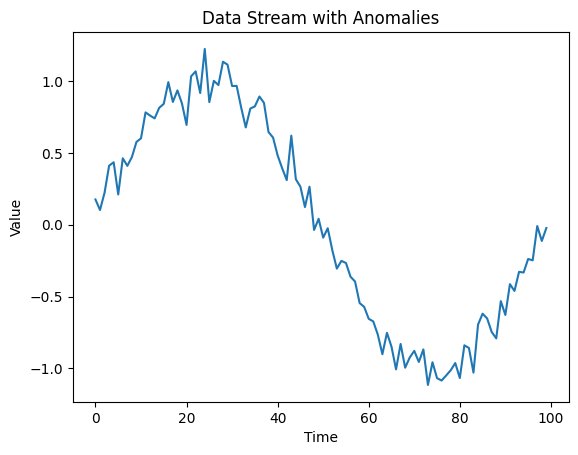

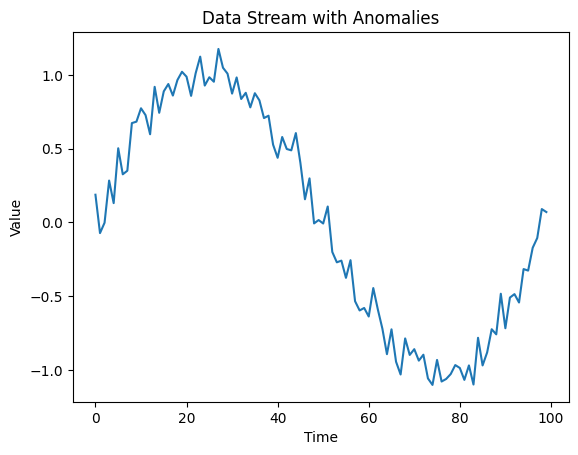

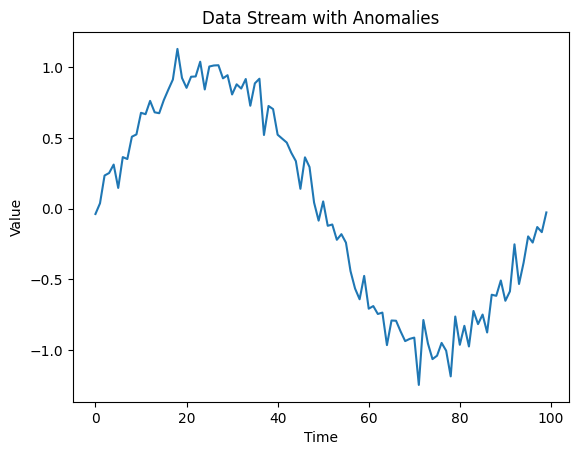

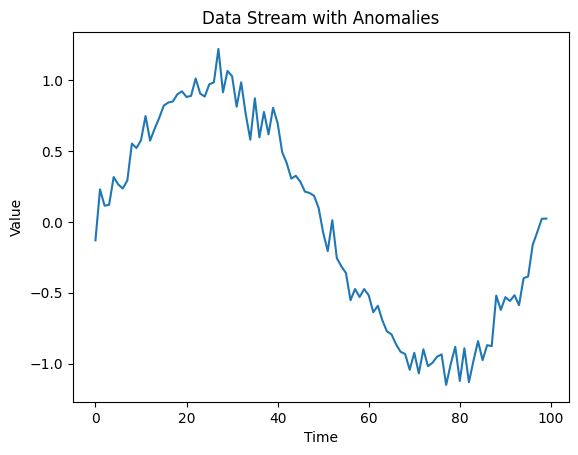

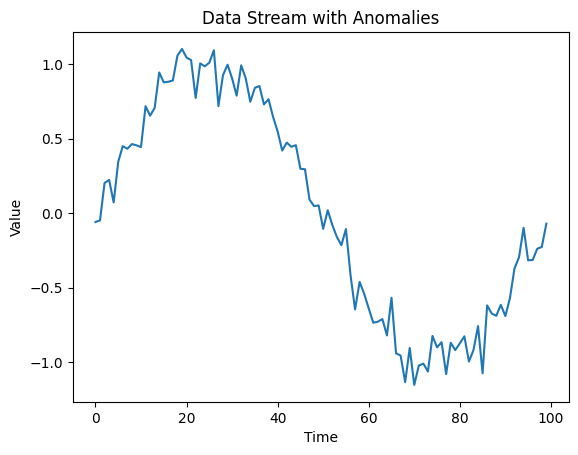

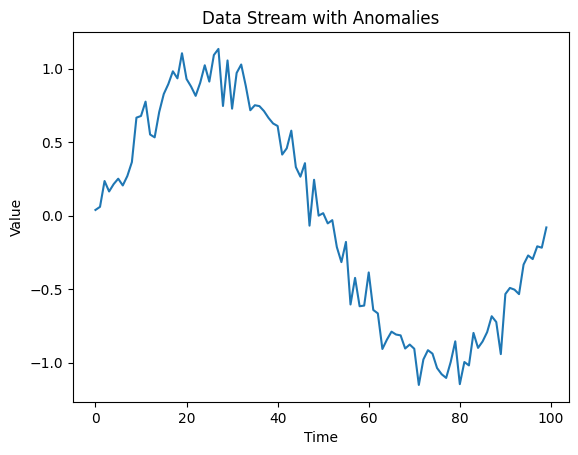

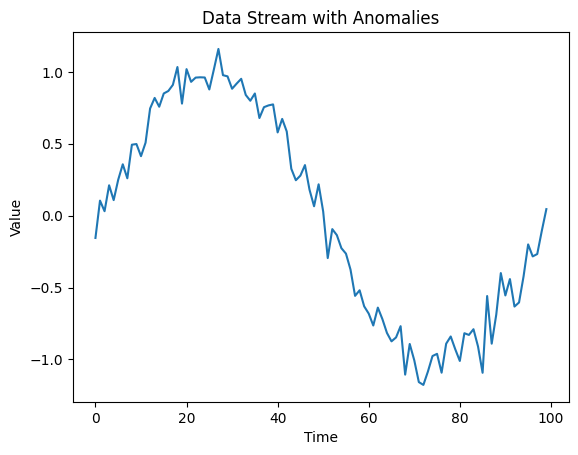

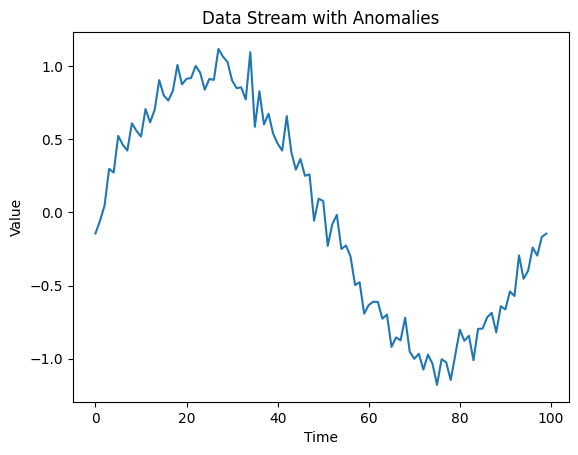

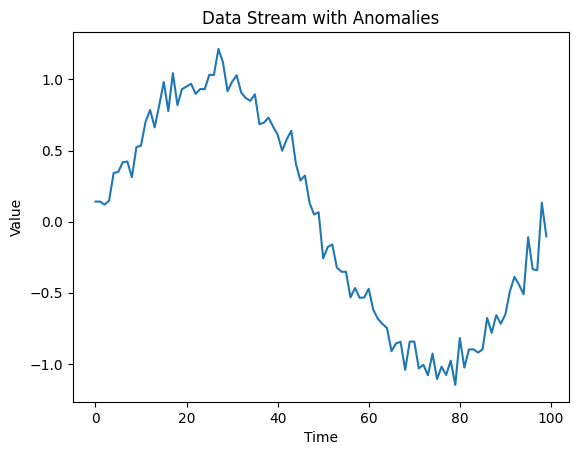

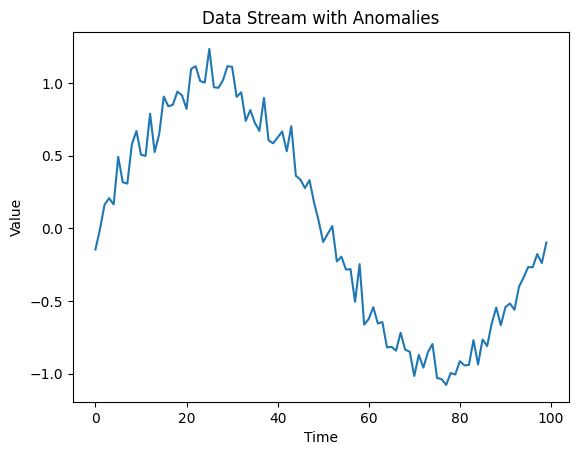

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Define the S-H-ESD algorithm
def sh_esd(data, window_size, threshold):
    # Calculate mean and standard deviation
    mean = np.mean(data)
    std = np.std(data)

    # Identify anomalies using ESD
    anomalies = np.abs(stats.zscore(data)) > threshold

    return anomalies

# Define the data stream simulation function
def simulate_data_stream(size, seasonality, noise_level):
    np.random.seed(0)
    time = np.arange(size)
    signal = np.sin(2 * np.pi * time / seasonality)
    noise = np.random.normal(0, noise_level, size)
    data = signal + noise
    return data

# Define the real-time visualization function
def visualize_data_stream(data, anomalies):
    # Create a line chart
    plt.plot(data)
    plt.scatter(np.where(anomalies)[0], data[anomalies], c='r')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Data Stream with Anomalies')
    plt.show(block=False)
    plt.pause(0.01)

# Main script
if __name__ == '__main__':
    # Set simulation parameters
    size = 1000
    seasonality = 100
    noise_level = 0.1

    # Simulate data stream
    data = simulate_data_stream(size, seasonality, noise_level)

    # Initialize anomaly detection
    window_size = 100
    threshold = 3
    anomalies = np.zeros(size, dtype=bool)

    # Process data stream in chunks
    for i in range(0, size, window_size):
        chunk = data[i:i+window_size]
        anomalies[i:i+window_size] = sh_esd(chunk, window_size, threshold)

        # Visualize data stream and anomalies
        visualize_data_stream(chunk, anomalies[i:i+window_size])

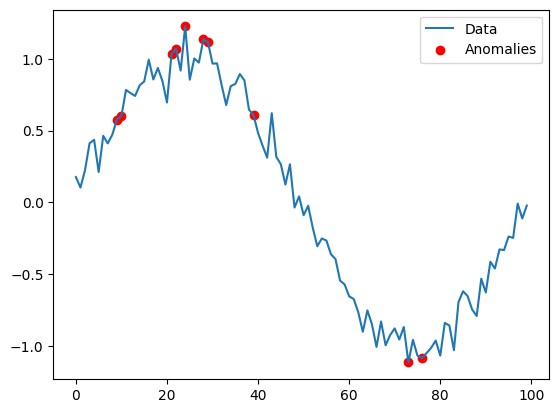

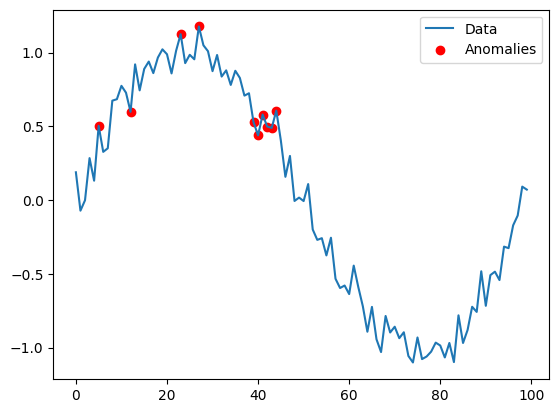

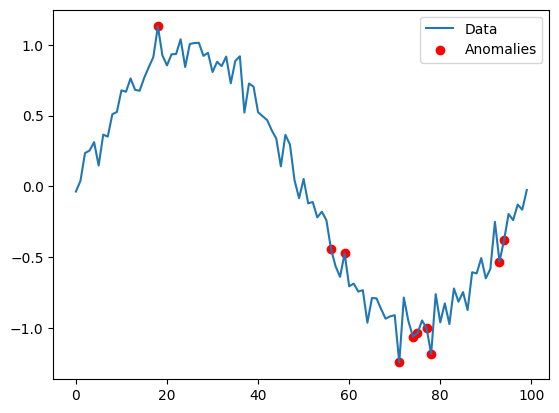

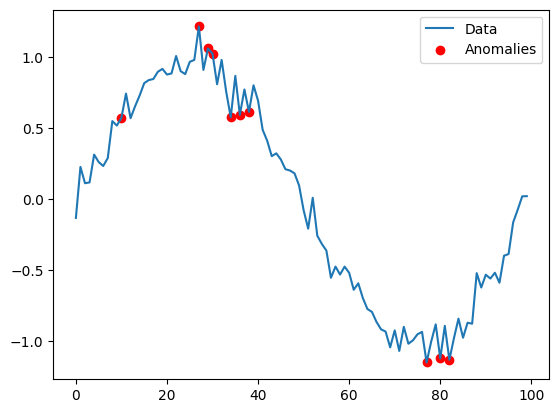

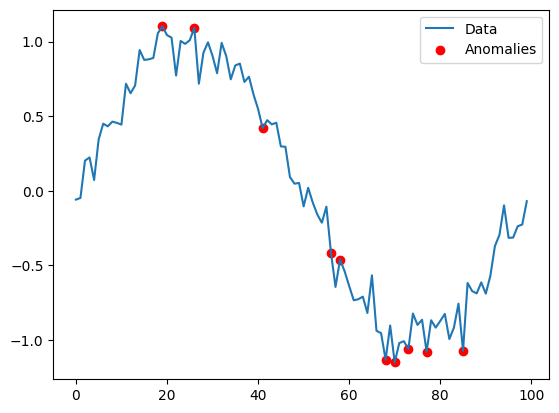

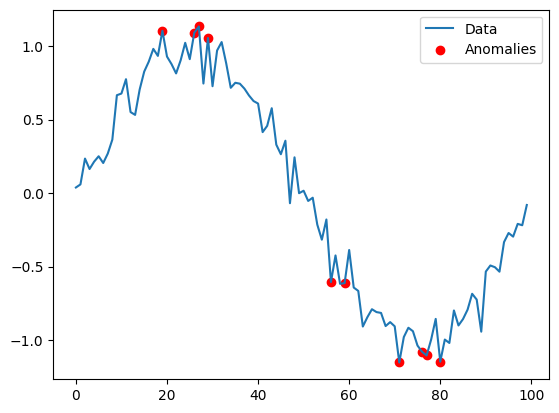

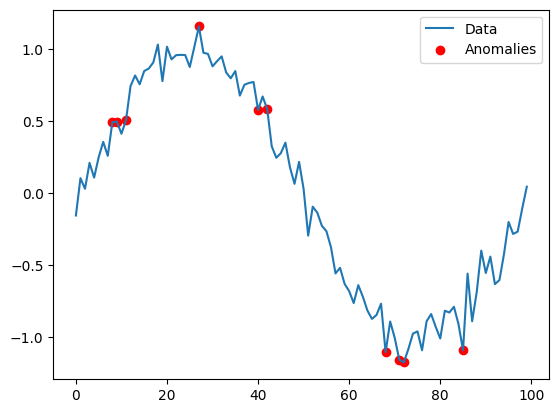

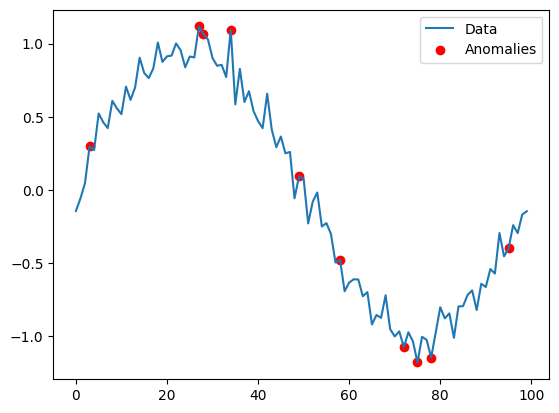

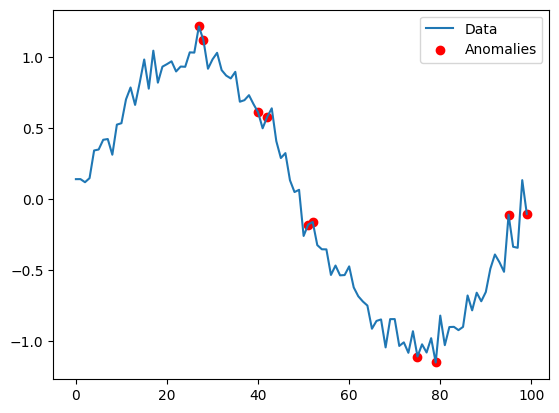

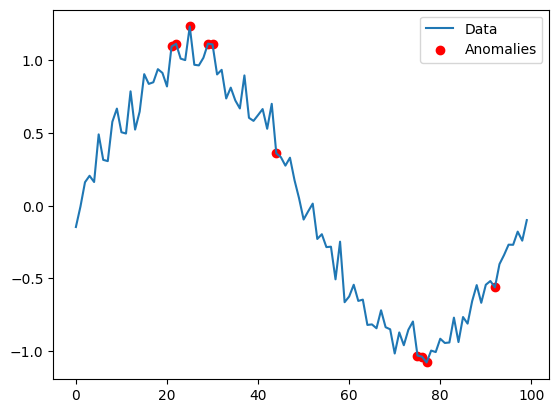

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Define the LOF algorithm
def lof(data, n_neighbors, contamination):
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    anomalies = lof.fit_predict(data)
    return anomalies

# Define the data stream simulation function
def simulate_data_stream(size, seasonality, noise_level):
    np.random.seed(0)
    time = np.arange(size)
    signal = np.sin(2 * np.pi * time / seasonality)
    noise = np.random.normal(0, noise_level, size)
    data = signal + noise
    return data

# Define the real-time visualization function
def visualize_data_stream(data, anomalies):
    plt.clf()
    plt.plot(data, label='Data')
    plt.scatter(np.where(anomalies==-1)[0], data[np.where(anomalies==-1)[0]], c='r', label='Anomalies')
    plt.legend()
    plt.pause(0.01)

# Main script
if __name__ == '__main__':
    # Set simulation parameters
    size = 1000
    seasonality = 100
    noise_level = 0.1
    window_size = 100

    # Simulate data stream
    data = simulate_data_stream(size, seasonality, noise_level)

    # Initialize anomaly detection
    n_neighbors = 20
    contamination = 0.1
    anomalies = np.zeros((size, 1), dtype=int)

    # Process data stream in chunks
    for i in range(0, size, window_size):
        chunk = data[i:i+window_size]
        chunk_anomalies = lof(chunk.reshape(-1, 1), n_neighbors, contamination)
        anomalies[i:i+window_size, 0] = chunk_anomalies

        # Visualize data stream and anomalies
        visualize_data_stream(chunk, chunk_anomalies)

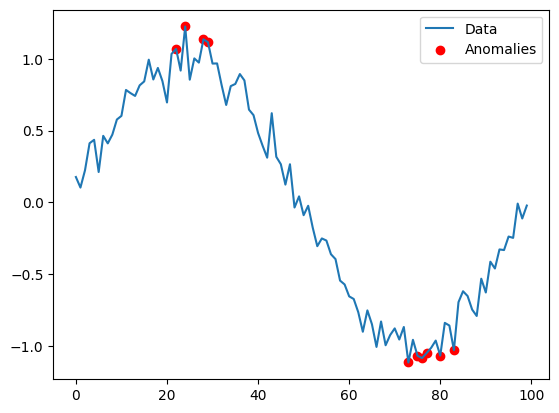

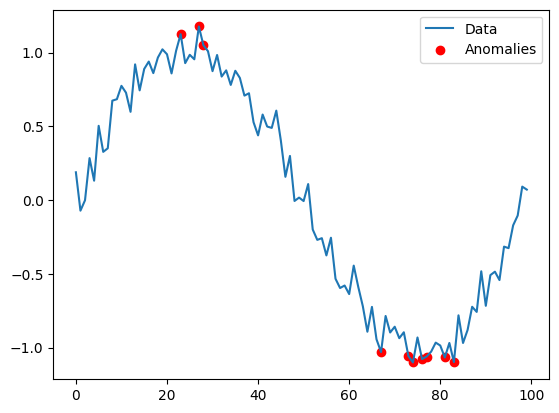

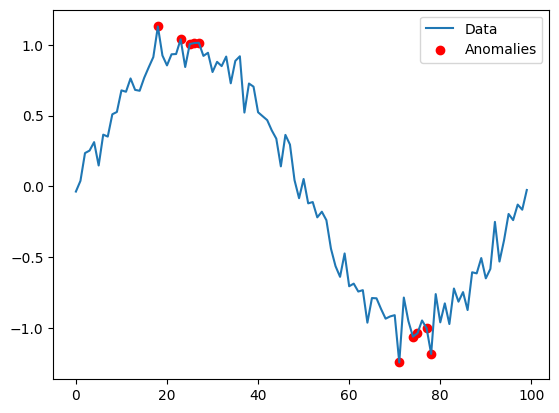

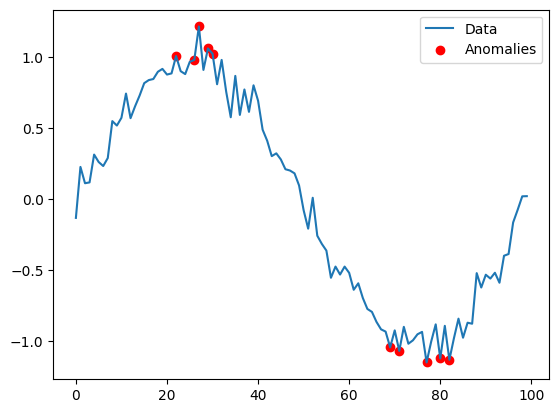

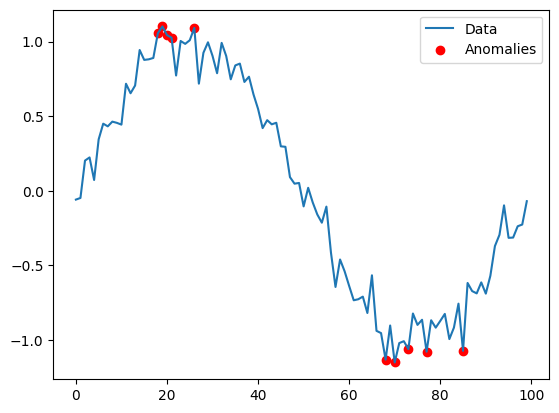

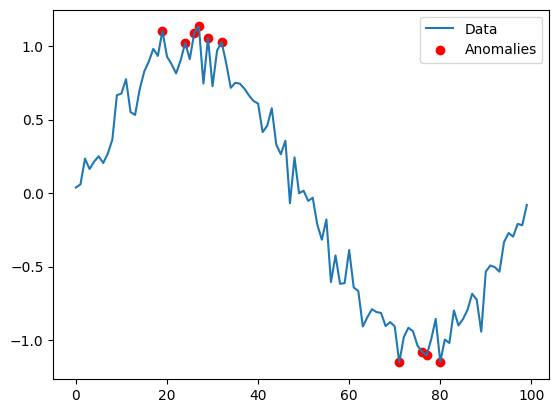

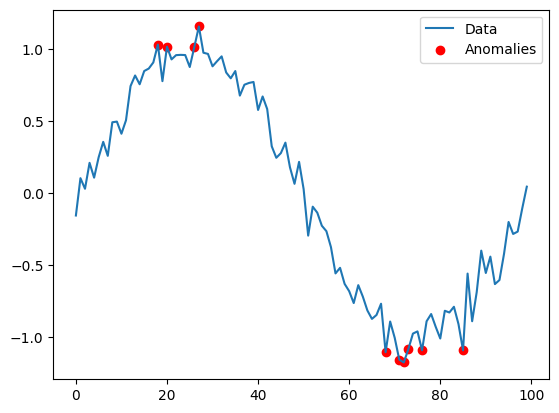

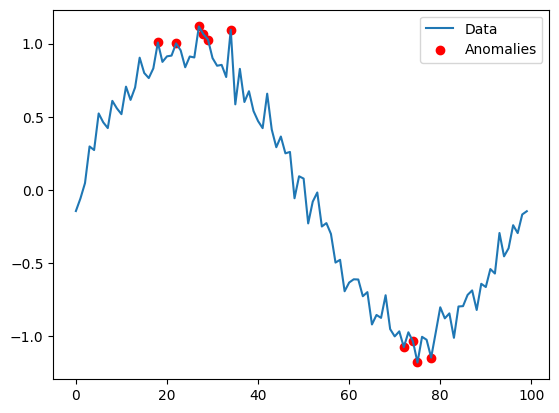

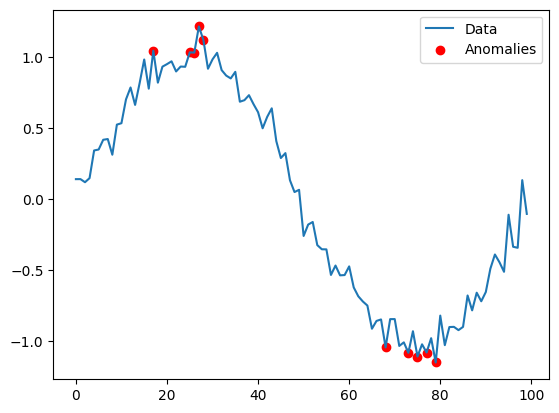

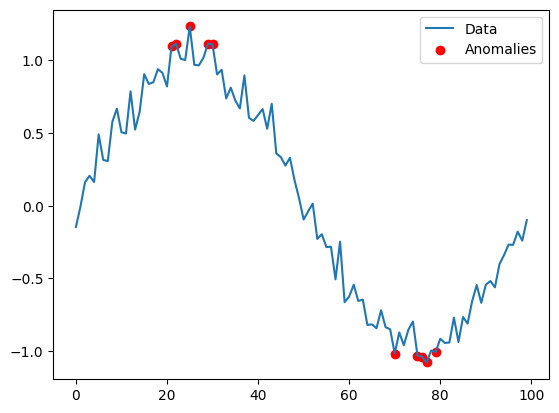

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

# Define the Robust Covariance algorithm
def robust_covariance(data, contamination):
    robust_cov = EllipticEnvelope(contamination=contamination)
    robust_cov.fit(data)
    anomalies = robust_cov.predict(data)
    return anomalies

# Define the data stream simulation function
def simulate_data_stream(size, seasonality, noise_level):
    np.random.seed(0)
    time = np.arange(size)
    signal = np.sin(2 * np.pi * time / seasonality)
    noise = np.random.normal(0, noise_level, size)
    data = signal + noise
    return data

# Define the real-time visualization function
def visualize_data_stream(data, anomalies):
    plt.clf()
    plt.plot(data, label='Data')
    plt.scatter(np.where(anomalies == -1)[0], data[np.where(anomalies == -1)[0]], c='r', label='Anomalies')
    plt.legend()
    plt.pause(0.01)

# Main script
if __name__ == '__main__':
    # Set simulation parameters
    size = 1000
    seasonality = 100
    noise_level = 0.1
    window_size = 100

    # Simulate data stream
    data = simulate_data_stream(size, seasonality, noise_level).reshape(-1, 1)  # Reshape for multivariate input

    # Initialize anomaly detection
    contamination = 0.1
    anomalies = np.zeros((size, 1), dtype=int)

    # Process data stream in chunks
    for i in range(0, size, window_size):
        chunk = data[i:i+window_size]
        chunk_anomalies = robust_covariance(chunk, contamination)
        anomalies[i:i+window_size, 0] = chunk_anomalies

        # Visualize data stream and anomalies
        visualize_data_stream(chunk, chunk_anomalies)

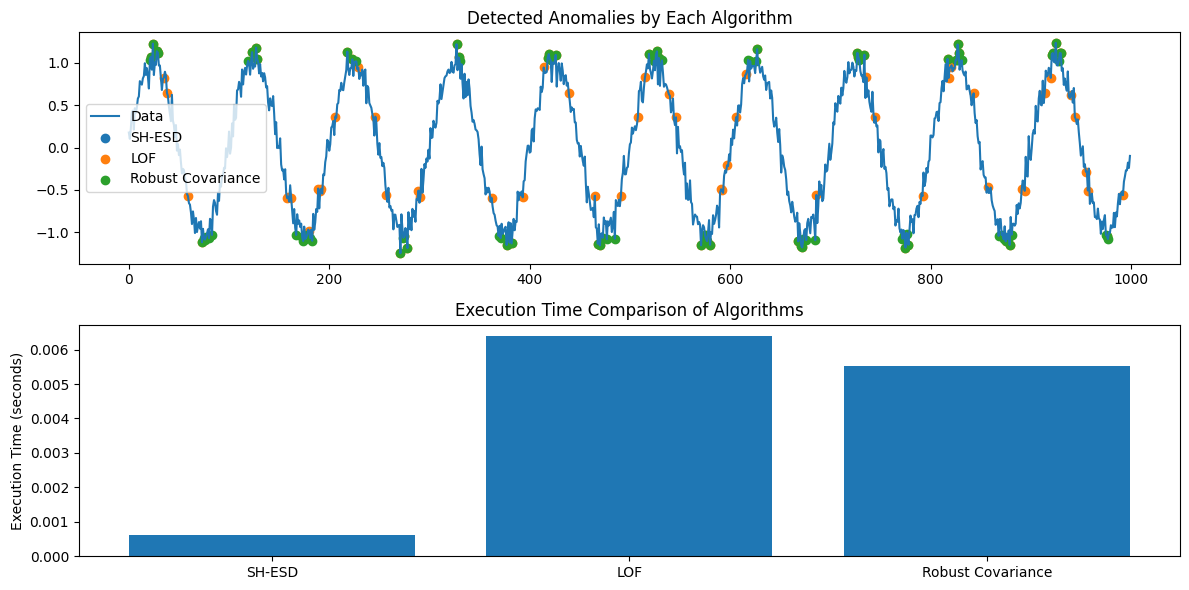

In [ ]:
import matplotlib.pyplot as plt
import time
import numpy as np

# Simulate data for all algorithms
size = 1000
seasonality = 100
noise_level = 0.1
data = simulate_data_stream(size, seasonality, noise_level).reshape(-1, 1)

# Function to run an algorithm and measure time
def run_algorithm(algorithm, data, *args):
    start_time = time.time()
    anomalies = algorithm(data, *args)
    end_time = time.time()
    return anomalies, end_time - start_time

# Run each algorithm and collect results
algorithms = {
    'SH-ESD': (sh_esd, 100, 3),
    'LOF': (lof, 20, 0.1),
    'Robust Covariance': (robust_covariance, 0.1)
}

results = {}
for name, (algorithm, *args) in algorithms.items():
    anomalies, execution_time = run_algorithm(algorithm, data, *args)
    results[name] = {'anomalies': anomalies, 'execution_time': execution_time}

# Plot the anomaly results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(data, label='Data')
for name, result in results.items():
    anomalies = result['anomalies']
    if name == 'LOF' or name == 'Robust Covariance':
        plt.scatter(np.where(anomalies == -1)[0], data[np.where(anomalies == -1)[0]], label=name)
    else:
        plt.scatter(np.where(anomalies)[0], data[np.where(anomalies)[0]], label=name)
plt.legend()
plt.title('Detected Anomalies by Each Algorithm')

# Plot the execution time for each algorithm
plt.subplot(2, 1, 2)
execution_times = [result['execution_time'] for result in results.values()]
algorithm_names = list(results.keys())
plt.bar(algorithm_names, execution_times)
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison of Algorithms')

plt.tight_layout()
plt.show()
